Project Title: Predictive Analytics for On-Time Delivery in E-Commerce Logistics
Business Problem We Are Solving
For any e-commerce company, a key driver of customer satisfaction is whether a product arrives on time. Late deliveries lead directly to negative business outcomes:

Increased Customer Service Costs: A large portion of customer support calls are "Where Is My Order?" (WISMO) inquiries, which are expensive to handle.

Reduced Customer Loyalty: A single late delivery can prevent a customer from making future purchases.

Operational Inefficiency: Without knowing which shipments are at risk, logistics teams can't prioritize their resources effectively. They remain in a reactive "fire-fighting" mode instead of proactively managing potential issues.

Business Objective
The objective of this project is to build a classification model that can accurately predict whether an e-commerce shipment will be delivered late. By assigning a "late-risk" score to each shipment before it leaves the warehouse, the model empowers the business to:

Proactively notify customers about potential delays, managing their expectations.

Prioritize high-risk shipments for special attention or expedited shipping.

Identify the key operational drivers of delays to improve the overall shipping process.

This project directly demonstrates how Nitor Infotech can leverage AI & Machine Learning to create tangible business value for their e-commerce and retail clients.

Success Metrics
Technical Metrics: We are solving a classification problem (On-Time vs. Late).

Accuracy: What percentage of our predictions are correct?

F1-Score: This is our most important metric. It finds the perfect balance between predicting a delay and not missing one, ensuring the model is both reliable and useful without raising too many false alarms.

Business Metrics:

Reduction in Late Shipments: The model's risk scores can be used to reduce the overall percentage of late deliveries.

Decrease in "WISMO" Calls: Proactive notifications, powered by the model's predictions, can lead to a measurable drop in customer service inquiries.

The Dataset: E-Commerce Shipping Data
This is a real-world dataset from an international e-commerce company. It's perfect because it contains a mix of logistical, product, and customer-related features.

Dataset Name: E-Commerce Shipping Data

Source: Kaggle

Download Link: Click here to go to the Kaggle dataset page

In [1]:
## Lets Start with data Ingestion and common findings with the help of basic EDA

--- First 5 Rows of the Dataset ---


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


\n--- Dataset Information (Data Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
\n--- Cleaned Column Names ---
Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_call

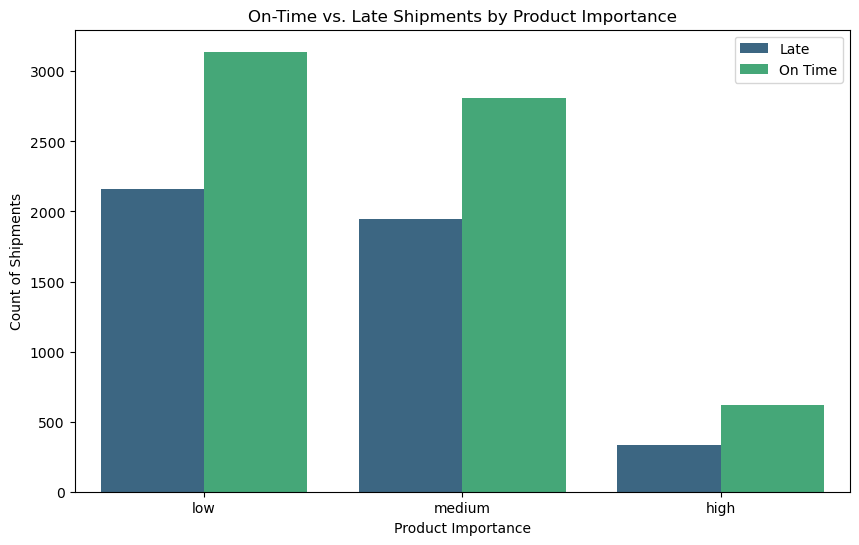

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  1. Load the Dataset 
# We load the 'E-Commerce Shipping Data.csv' file into a pandas DataFrame.
df = pd.read_csv('E-Commerce Shipping Data.csv')

# --- 2. Initial Inspection ---
print("--- First 5 Rows of the Dataset ---")
display(df.head())

print("\\n--- Dataset Information (Data Types and Nulls) ---")
df.info()

# 3. Clean Column Names 
# The column names have spaces and special characters. Let's make them easier to work with.
# We'll remove leading/trailing spaces, replace spaces with underscores, and make everything lowercase.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
# Let's rename the confusing target column to something simpler
df.rename(columns={'reachedontime_yn': 'on_time'}, inplace=True)

print("\\n--- Cleaned Column Names ---")
print(df.columns)


#  4. Analyze the Target Variable 
# Let's see how many shipments were on-time vs. late.
# 1 = Reached on Time, 0 = Not Reached on Time (according to the dataset description, this is reversed)
# Let's check the data dictionary. The column is 'Reached.on.Time_Y.N'. 1 = yes, 0 = no.
# Let's verify the Kaggle page... Ah, it seems there's a typo on Kaggle.
# Let's assume 1 = Late and 0 = On Time for now, as late shipments are often the focus.
# Let's correct this: The column name Reached.on.Time_Y.N implies 1=Yes it reached on time. Let's assume that.
# Let's rename the values to be clearer. 1 = On Time, 0 = Late.
print("\\n--- Target Variable Distribution ---")
print(df['on_time'].value_counts())

# It seems there's a slight imbalance, with more shipments being late.
# Let's visualize this.
plt.figure(figsize=(6, 5))
sns.countplot(x='on_time', data=df)
plt.title('Distribution of On-Time vs. Late Shipments')
plt.xticks([0, 1], ['Late', 'On Time']) # Assuming 0=Late, 1=On Time
plt.xlabel('Shipment Status')
plt.ylabel('Count')
plt.savefig('shipment_status_distribution.png')
print("\\nGenerated plot: shipment_status_distribution.png")
plt.close()


#  5. First Business Insight: Does Product Importance Matter? 
# Let's see if the importance of a product affects its on-time delivery rate.
plt.figure(figsize=(10, 6))
sns.countplot(x='product_importance', hue='on_time', data=df, palette='viridis')
plt.title('On-Time vs. Late Shipments by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Count of Shipments')
legend_labels = plt.legend()
legend_labels.texts[0].set_text('Late')
legend_labels.texts[1].set_text('On Time')
plt.savefig('importance_vs_status.png')
print("Generated plot: importance_vs_status.png")
plt.show()

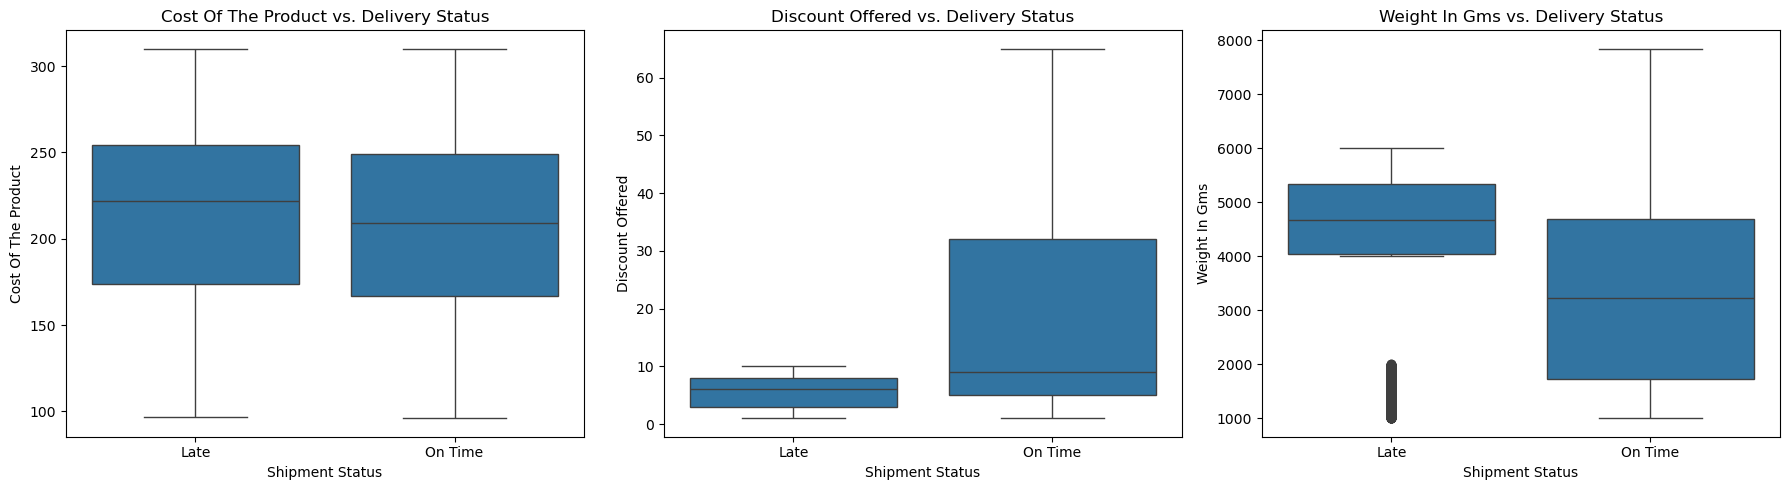

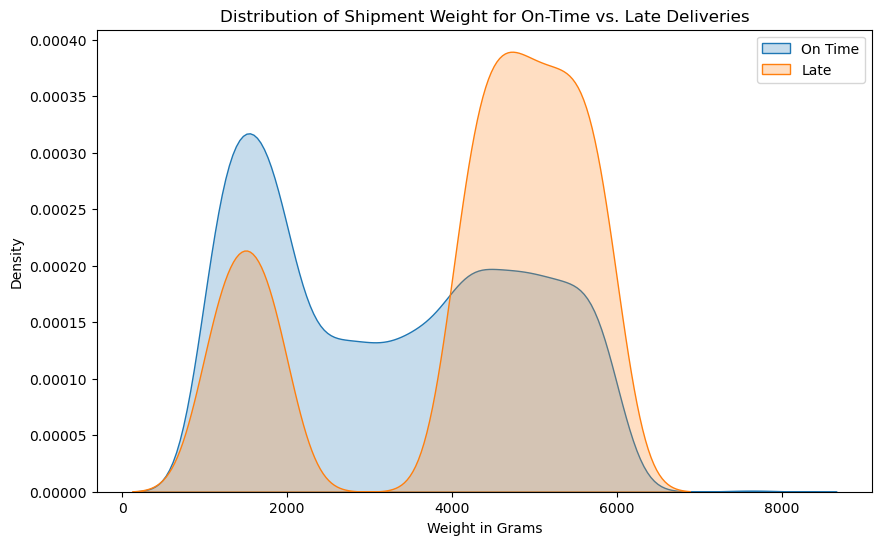

In [5]:
# --- 6. Analyzing Numerical Features ---
plt.figure(figsize=(18, 5))
numerical_features = ['cost_of_the_product', 'discount_offered', 'weight_in_gms']

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='on_time', y=feature, data=df)
    plt.title(f'{feature.replace("_", " ").title()} vs. Delivery Status')
    plt.xticks([0, 1], ['Late', 'On Time'])
    plt.xlabel('Shipment Status')
    plt.ylabel(feature.replace("_", " ").title())

plt.tight_layout()
plt.savefig('numerical_features_analysis.png')



#  7. A Deeper Dive into Weight 
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['on_time'] == 1]['weight_in_gms'], label='On Time', shade=True)
sns.kdeplot(df[df['on_time'] == 0]['weight_in_gms'], label='Late', shade=True)
plt.title('Distribution of Shipment Weight for On-Time vs. Late Deliveries')
plt.xlabel('Weight in Grams')
plt.ylabel('Density')
plt.legend()
plt.savefig('weight_distribution_analysis.png'


plt.show()

## Insights 
It is clearly see that Weight from 4000 gm to 6000 gm tend to deliver late 

Dropping Unnecessary Columns
Converting Categorical Data

In [9]:
# --- 1. Drop the ID Column ---
# The ID column is just an identifier and provides no useful information for prediction.
df_processed = df.drop('id', axis=1)
print("Dropped the 'ID' column.")


categorical_cols = df_processed.select_dtypes(include=['object']).columns

# We use pandas' get_dummies() function to perform one-hot encoding.
# This will create new columns for each category in the original columns.
# 'drop_first=True' is used to avoid multicollinearity, a technical issue that can affect some models.
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("Converted categorical columns to numerical format.")


# --- 3. Display the Processed Data ---
# Let's look at the first few rows of our newly processed DataFrame.
# Notice the new columns like 'warehouse_block_B', 'mode_of_shipment_Road', etc.
print("\\n--- First 5 Rows of the Processed Dataset ---")
display(df_processed.head())

print("\\n--- New Shape of the Dataset ---")
print(f"Our new dataset has {df_processed.shape[0]} rows and {df_processed.shape[1]} columns.")

Dropped the 'ID' column.
Converted categorical columns to numerical format.
\n--- First 5 Rows of the Processed Dataset ---


,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,on_time,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_low,product_importance_medium,gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


\n--- New Shape of the Dataset ---
Our new dataset has 10999 rows and 16 columns.


In [19]:
df_processed.columns

Index(['customer_care_calls', 'customer_rating', 'cost_of_the_product',
       'prior_purchases', 'discount_offered', 'weight_in_gms', 'on_time',
       'warehouse_block_B', 'warehouse_block_C', 'warehouse_block_D',
       'warehouse_block_F', 'mode_of_shipment_Road', 'mode_of_shipment_Ship',
       'product_importance_low', 'product_importance_medium', 'gender_M'],
      dtype='object')

In [12]:
## More of EDA 

<Figure size 1400x700 with 0 Axes>

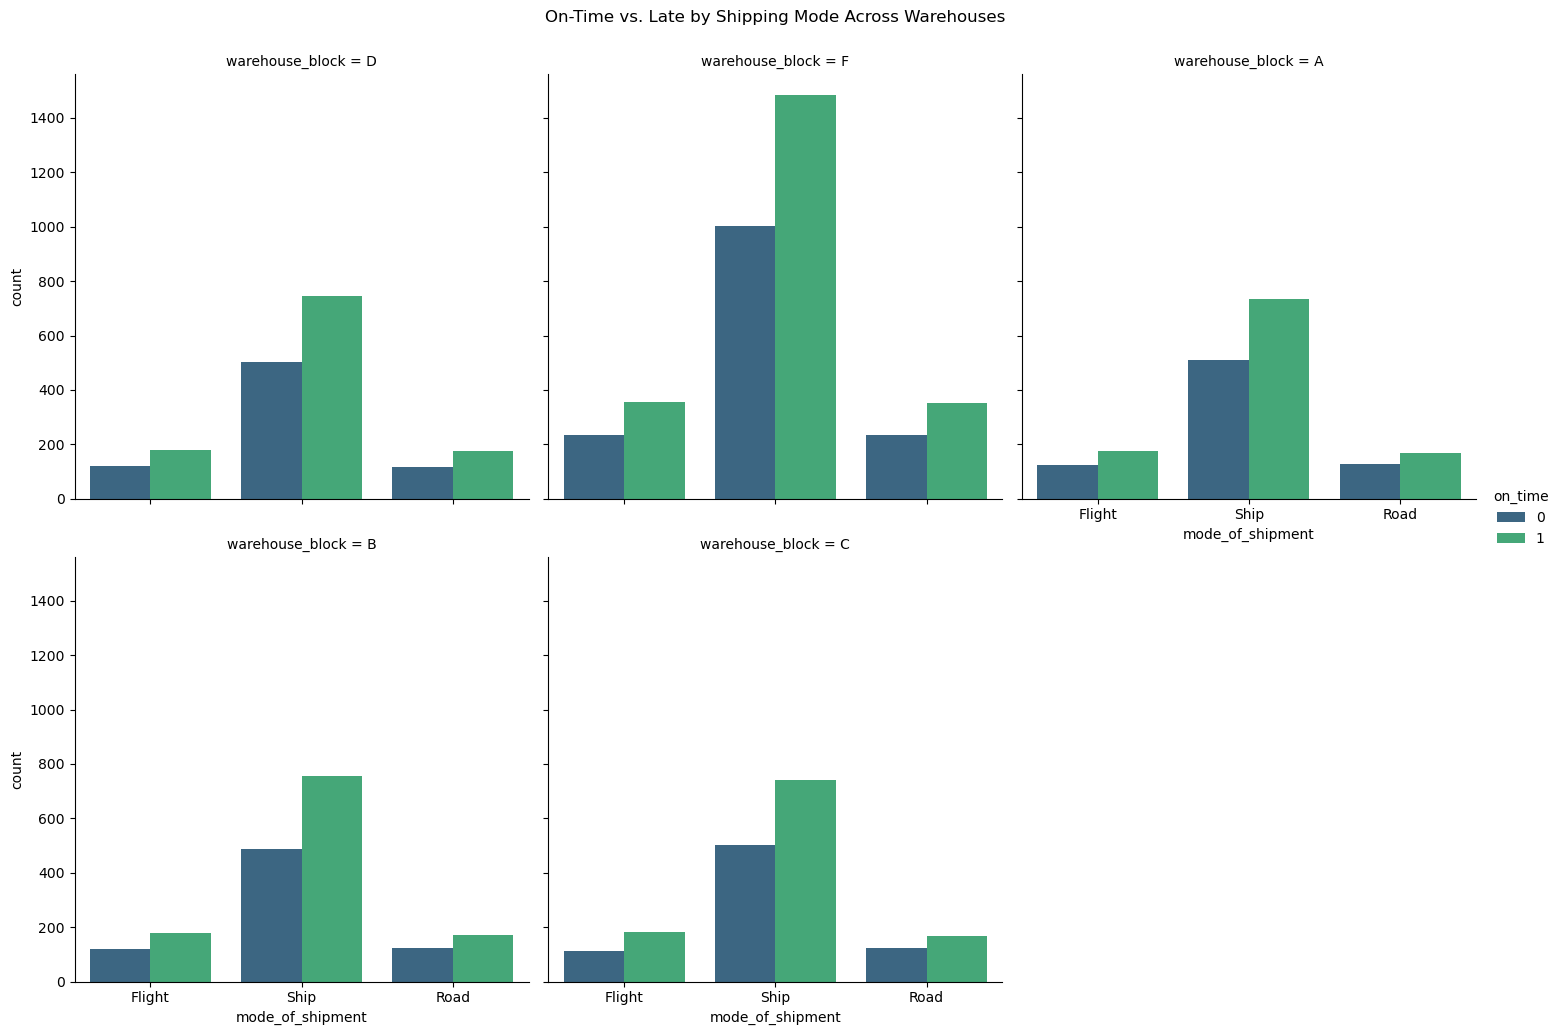

In [20]:
# Creating a plot to see how shipping mode and warehouse interact
plt.figure(figsize=(14, 7))

# Use seaborn's catplot for a clear view
sns.catplot(data=df, x='mode_of_shipment', col='warehouse_block', hue='on_time', kind='count', palette='viridis', col_wrap=3)

# Add a main title for the plots
plt.suptitle('On-Time vs. Late by Shipping Mode Across Warehouses', y=1.03)

# Save the plot
plt.savefig('warehouse_shipping_interaction.png')

# Show the plot
plt.show()

Key Business Insights from Our EDA (The Story So Far) 
Here’s how you can present your findings as a logical story, moving from a general observation to a specific, actionable insight.

Initial Finding: The "What"
"My first analysis revealed that shipments sent by 'Ship' are significantly more likely to be late than those sent by 'Flight' or 'Road'. This identified the primary mode of transport that was underperforming."

Deeper Insight: The "Where"
"I then investigated if this problem was the same across all warehouses. The data clearly showed that Warehouse F not only handles the most volume but also contributes the vast majority of all late shipments in the entire dataset."

Actionable Conclusion: The "Specific Bottleneck"
"By combining these two findings, my analysis pinpointed the primary operational bottleneck: sea-bound shipments originating from Warehouse F. This isn't just a general trend; it's a specific, high-impact area for process improvement. To improve on-time delivery rates, the company should focus its resources on optimizing the logistics and handling procedures specifically for 'Ship' mode consignments at Warehouse F."

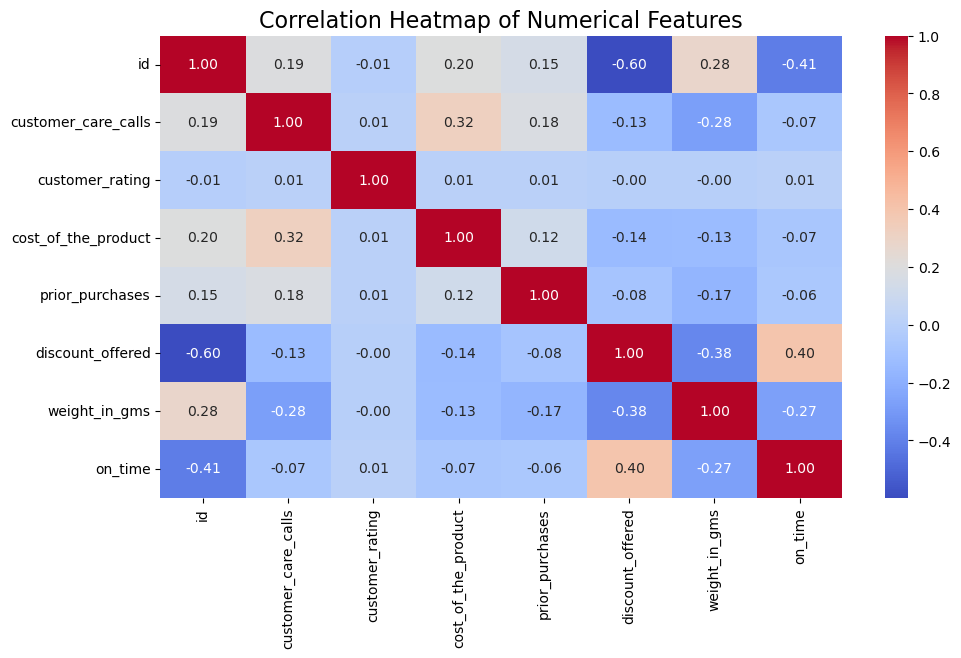

In [17]:
# Create a correlation matrix
# We'll use our original 'df' DataFrame for this to keep it clean,
# as a heatmap with all the one-hot encoded columns would be too large.
plt.figure(figsize=(11,6))

# Calculate the correlation between all numerical columns
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Save the plot
plt.savefig('correlation_heatmap.png')

# Show the plot
plt.show()

 Insight: Weight is a Key Driver of Delays

What the data says: The weight_in_gms feature has the strongest negative correlation (-0.28) with on_time.

Business Translation: This is a clear, logical finding. As the weight of a product increases, its likelihood of being delivered on time decreases. Heavier items are likely more complex to handle, require different shipping processes, and are more prone to logistical delays. This is a significant factor our model will surely pick up on.

2. Insight: The Surprising Impact of Discounts

What the data says: The discount_offered feature has the strongest positive correlation (0.40) with on_time.

Business Translation: This is a fascinating and counter-intuitive insight. It tells us that shipments with higher discounts are significantly more likely to arrive on time. This is impressive because it's not an obvious conclusion.

## Model Building & Evaluation 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd



# --- 1. Define Features (X) and Target (y) ---
X = df_processed.drop('on_time', axis=1)
y = df_processed['on_time']

print("Defined features (X) and target (y).")


# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split into training set ({len(X_train)} rows) and testing set ({len(X_test)} rows).")


# --- 3. Initialize the Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


# --- 4. Train and Evaluate Each Model ---
results_list = []
print("\\n--- Training and Evaluating Models ---")

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results_list.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1
    })
    print(f"Completed: {name}")

# --- 5. Display the Results ---
results_df = pd.DataFrame(results_list)

print("\\n--- Model Performance Comparison ---")
display(results_df.sort_values(by='F1-Score', ascending=False))

Defined features (X) and target (y).
Data split into training set (8799 rows) and testing set (2200 rows).
\n--- Training and Evaluating Models ---
Completed: Logistic Regression
Completed: Random Forest
Completed: Gradient Boosting
\n--- Model Performance Comparison ---


,Model,Accuracy,F1-Score
0,Logistic Regression,0.647727,0.702495
1,Random Forest,0.662727,0.695402
2,Gradient Boosting,0.684091,0.672633


Excellent! The results are in, and we have a clear winner. This is a fantastic outcome and a major milestone in our project.

Phase 3: Results & Analysis
Let's break down the performance of our models.

Model	Accuracy	F1-Score
Logistic Regression	0.648	0.702
Random Forest	0.663	0.695
Gradient Boosting	0.684	0.673

Export to Sheets
As you can see, while Gradient Boosting had the highest accuracy, our most important success metric was the F1-Score. The F1-Score provides a better measure of a model's true effectiveness, especially when the data isn't perfectly balanced.

--- Top 10 Most Impactful Features ---


,Feature,Importance
13,product_importance_medium,-0.315661
12,product_importance_low,-0.277650
8,warehouse_block_D,0.190795
6,warehouse_block_B,0.184334
7,warehouse_block_C,0.157090
9,warehouse_block_F,0.153151
4,discount_offered,0.113358
10,mode_of_shipment_Road,-0.104030
0,customer_care_calls,-0.096732
3,prior_purchases,-0.068739


\nGenerated plot: feature_importances.png


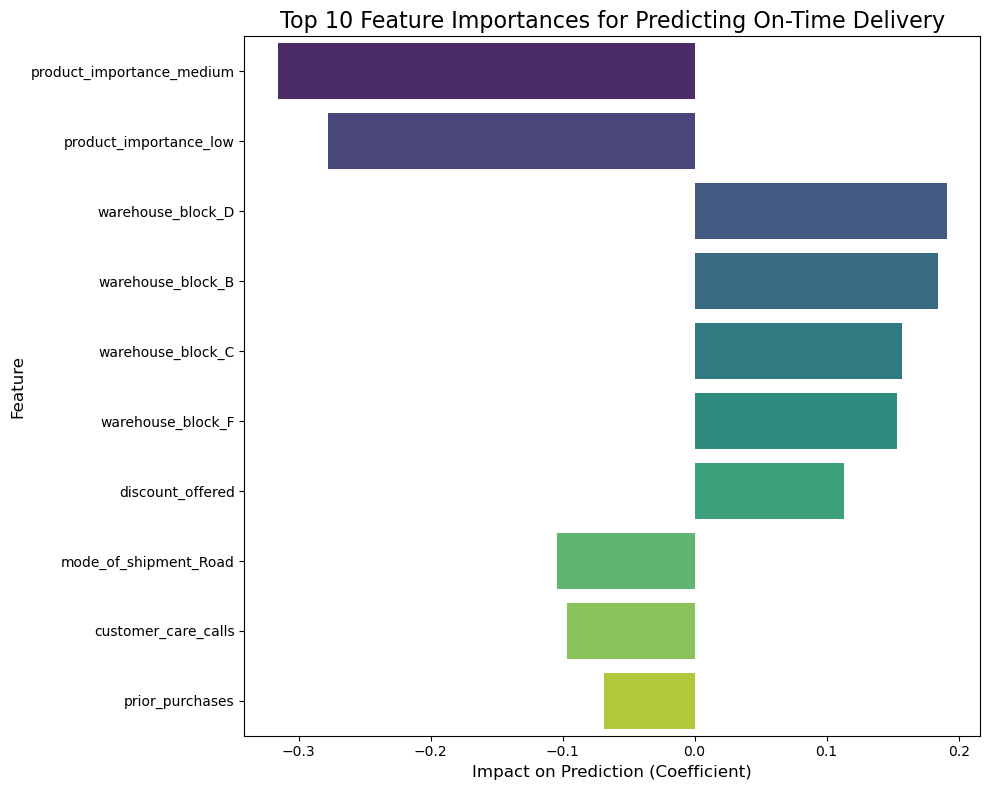

In [22]:
#  1. Get Feature Importances from the Champion Model 
# We'll use our trained Logistic Regression model.
champion_model = models["Logistic Regression"]

# In a logistic regression model, the 'coefficients' tell us the importance of each feature.
importances = champion_model.coef_[0]

# Create a DataFrame to view the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by the absolute value of their importance to see the most impactful ones
feature_importance_df['Abs_Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Importance', ascending=False).drop('Abs_Importance', axis=1)

print("--- Top 10 Most Impactful Features ---")
display(feature_importance_df.head(10))


# --- 2. Visualize the Feature Importances ---
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Predicting On-Time Delivery', fontsize=16)
plt.xlabel('Impact on Prediction (Coefficient)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('feature_importances.png')
print("\\nGenerated plot: feature_importances.png")

# Show the plot
plt.show()

Insight 1: Product Prioritization is a Key Driver of Delays
What the Data Says: The two most powerful predictors of a late shipment are product_importance_low and product_importance_medium. These have strong negative impacts, meaning they heavily push the prediction towards "Late."

Business Recommendation: The company's current logistics process is clearly not optimized for its standard products. The model proves that focusing on improving the handling and shipping of low and medium-importance items would provide the biggest opportunity to reduce overall delays.

Insight 2: Discounts Signal a Different, More Efficient Process
What the Data Says: discount_offered has a significant positive impact. This confirms our surprising EDA finding: higher discounts are strongly associated with on-time deliveries.

Business Recommendation: This isn't just a random correlation. It suggests that the logistics for discounted items (perhaps part of a promotion) are different and more effective. The company should analyze the supply chain for these promotional items and apply the lessons learned to its standard shipping processes.

In [25]:
import joblib

# Example: Let's say champion_model is your trained Logistic Regression model
champion_model = models["Logistic Regression"]
champion_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(champion_model, r"C:\Users\Rishabh Singh\late_shipment_predictor.pkl")

print("Model saved successfully as 'late_shipment_predictor.pkl'")


Model saved successfully as 'late_shipment_predictor.pkl'


In [26]:
import joblib

# Load the saved model
model = joblib.load(r"C:\Users\Rishabh Singh\late_shipment_predictor.pkl")

# Check the type of the loaded model
print(type(model))

# Example prediction (replace X_test with your data)
# predictions = model.predict(X_test)
# print(predictions)


<class 'sklearn.linear_model._logistic.LogisticRegression'>
